## **Superstore Data Analysis**

#### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import os

**Load the Dataset**

In [3]:
df=pd.read_csv("SampleSuperstore.csv")

### **Pre-Processing of Data & Exploratory data analysis**

*Peek at the Data*

In [4]:
# Read the First few Rows of Dataset
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [5]:
# Read the Last five Rows of Dataset
df.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

Dimensions of the data

In [6]:
# Count the Total rows and columns
df.shape

(9994, 13)

Columns in the Data

In [7]:
# column names of table
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Data types of each column

In [8]:
# check data type of columns/attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### *Full summary of data*

In [9]:
# Check the Null Count in Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### *Statistical summary of data*

In [10]:
# Statistical description of the data
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

#### **Handling the Missing values**

In [11]:
# Lets check if there are any missing values in the data
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values.Hence we can go exploratory analysis part directly.

#### **Droping Unnecessary Columns**

Check for unnecessary columns and drop them if not required

'Postal Code' column is nothing so we can drop this column.

**Dropping of postal code column**

In [12]:
# Dropping  Postal Code column and assigning to df
df=df.drop('Postal Code',axis=1)
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount    Profit  
0  South        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1  South        Furniture       Chairs  731.9400         3      0.00  219.5820  
2   West  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3  South        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  South  Office Supplies      Storage   22.3680         2      0.20    2.5164

In [13]:
# Check the Counts in Country column
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Clearly the data is for **US** country only, so we can drop the 'Country' column as we don't need any analysis to be done based on it.

**Dropping of Country column**

In [14]:
# dropping Country column
df=df.drop('Country',axis=1)
df.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164

In [15]:
# Check unique values in the columns
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['State'].unique())
print(df['Region'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['South' 'West' 'Central' 'East']


### *Number of duplicate values in data*

In [16]:
df.duplicated().sum()

50

### **Dropping the duplicate values**

In [17]:
df.drop_duplicates()

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category     Sales  Quantity  Discount    Profit  
0           Furniture    Bookcases  261.9600         2      0.00   41.9136  
1           Furniture       Chairs  731.9400         3      0.00  219.5820  
2     Office Supplies       Labels   14.6200         2      0.00    6.8714  
3           Furniture       Tables  957.5775         5      0.45 -383.0310  
4     Office Supplies      Storage   22.3680         2      0.20    2.5164  
...               ...          ...       ...       ...       ...       ...  
9989        Furniture  Furnishings   25.2480         3      0.20    4.1028  
9990        Furniture  Furnishings   91.9600         2      0.00   15.6332  
9991       Technology       Phones  258.5760         2      0.20   19.3932  
9992  Office Supplies        Paper   29.6000         4      0.00   13.3200  
9993  Office Supplies   Appliances  243.1600         2      0.00   72.9480  

[9944 rows x 11 columns]

### **Correlation among the columns**

In [18]:
df.corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000

### **Covariance between set of variables**

In [19]:
df.cov()

Sales    Quantity   Discount        Profit
Sales     388434.455308  278.459923  -3.627228  69944.096586
Quantity     278.459923    4.951113   0.003961     34.534769
Discount      -3.627228    0.003961   0.042622    -10.615173
Profit     69944.096586   34.534769 -10.615173  54877.798055

**Slicing of Data**

In [20]:
df.iloc[0]

Ship Mode       Second Class
Segment             Consumer
City               Henderson
State               Kentucky
Region                 South
Category           Furniture
Sub-Category       Bookcases
Sales                 261.96
Quantity                   2
Discount                 0.0
Profit               41.9136
Name: 0, dtype: object

In [21]:
df.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

### **Summary of Data**

In [22]:
df.value_counts()

Ship Mode       Segment      City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                             Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                             Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                                                                                                           ..
Second Clas

### **Visualization of Data**

We can analyse the data further in 4 different ways

> * REGION LEVEL ANALYSIS
> * SEGMENT LEVEL ANALYSIS
> * CATEGORY & SUB-CATEGORY LEVEL ANALYSIS
> * STATE LEVEL ANALYSIS

#### **Analysis based on Region**

<Axes: xlabel='Region', ylabel='count'>

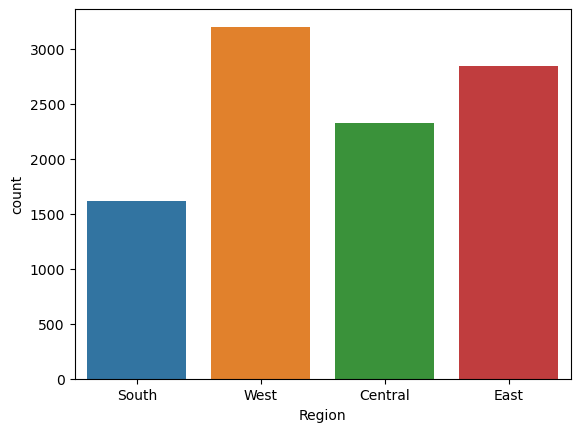

In [23]:
# Total count of each Region
sns.countplot(x=df['Region'])

<Axes: xlabel='Region'>

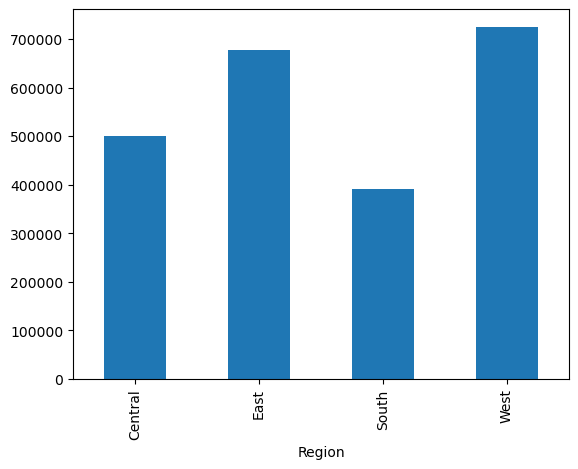

In [24]:
# Sales analysis based on region
df.groupby('Region')['Sales'].sum().plot.bar()

<Axes: xlabel='Region'>

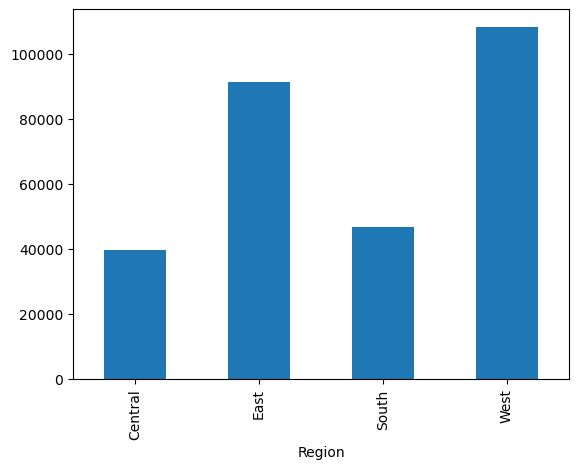

In [25]:
# Profit analysis based on region
df.groupby('Region')['Profit'].sum().plot.bar()

### **Sales and Profit Region wise**

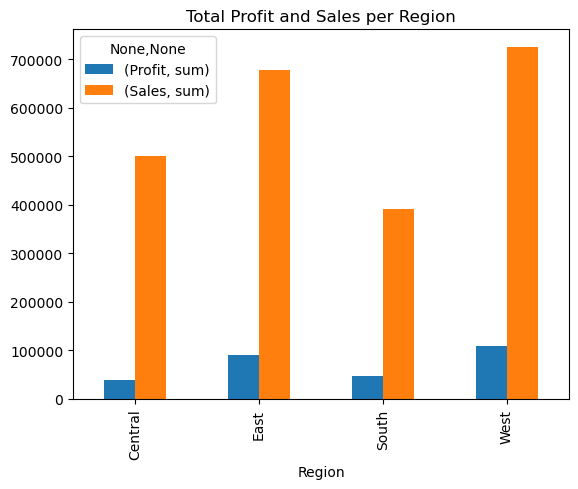

In [26]:
# Total Profit and Sales per Region
df.groupby('Region')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Region')
plt.show()

<Axes: ylabel='Sales'>

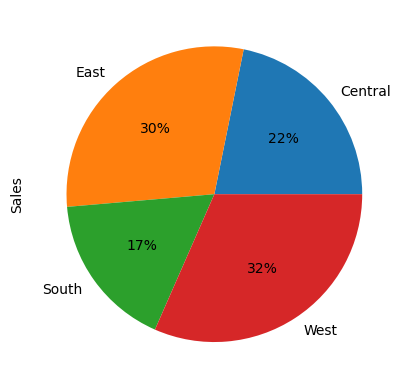

In [27]:
# sales chart based on region
df.groupby('Region')['Sales'].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

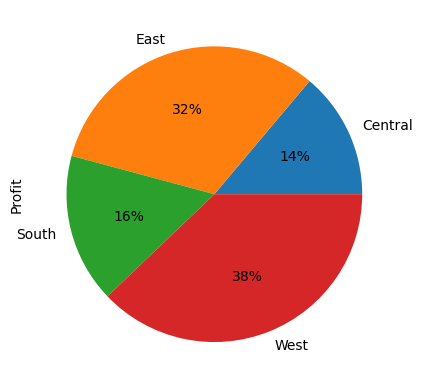

In [28]:
# Profit chart based on region
df.groupby('Region')['Profit'].sum().plot.pie(autopct="%1.0f%%")

Sales analysis --> west > east > central > south

Profit analysis --> west > east > south > central

#### **Analysis based on Segment**

###  **Total count of each segment**

<Axes: xlabel='Segment', ylabel='count'>

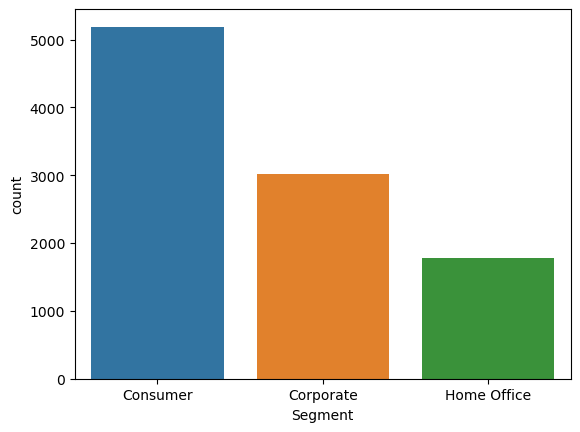

In [29]:
sns.countplot(x=df['Segment'])

### **Sales analysis based on segment**

<Axes: xlabel='Segment'>

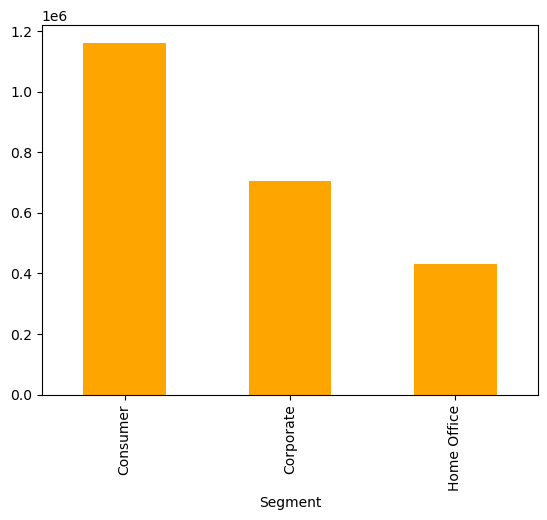

In [30]:
df.groupby('Segment')['Sales'].sum().plot.bar(color='orange')

### **Profit analysis based on segment**

<Axes: xlabel='Segment'>

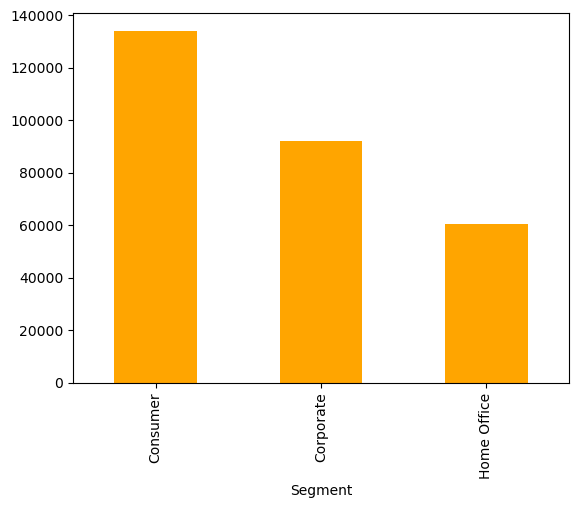

In [31]:
df.groupby('Segment')['Profit'].sum().plot.bar(color='orange')

Profit and Sales both has same segment structure.

i.e. consumer > corporate > Home Office

#### **Analysis based on Category & Sub-Category**

<Axes: ylabel='Sales'>

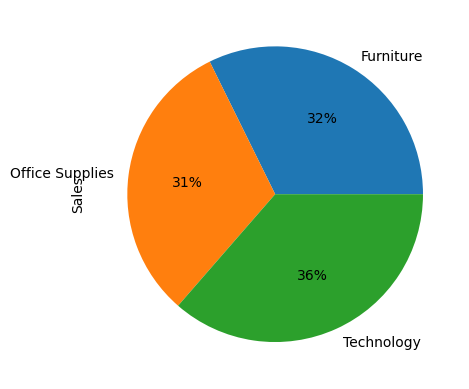

In [32]:
# sales chart based on category
df.groupby('Category')['Sales'].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

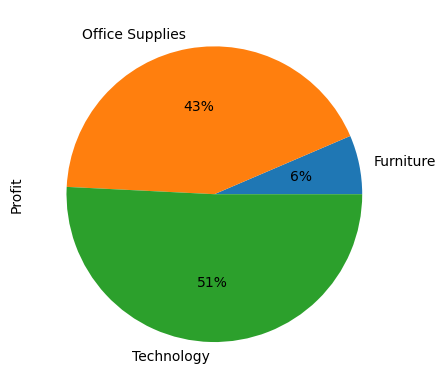

In [33]:
# Profit chart based on category
df.groupby('Category')['Profit'].sum().plot.pie(autopct="%1.0f%%")

From this chart its clearly seen Profit and Sales is balanced in Technology and Office Supplies category but in Furniture has in loss.

Lets look at the product categories available to shop for customers

In [34]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [35]:
#number of products in each category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [36]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [37]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### **Sub-category Vs Category**

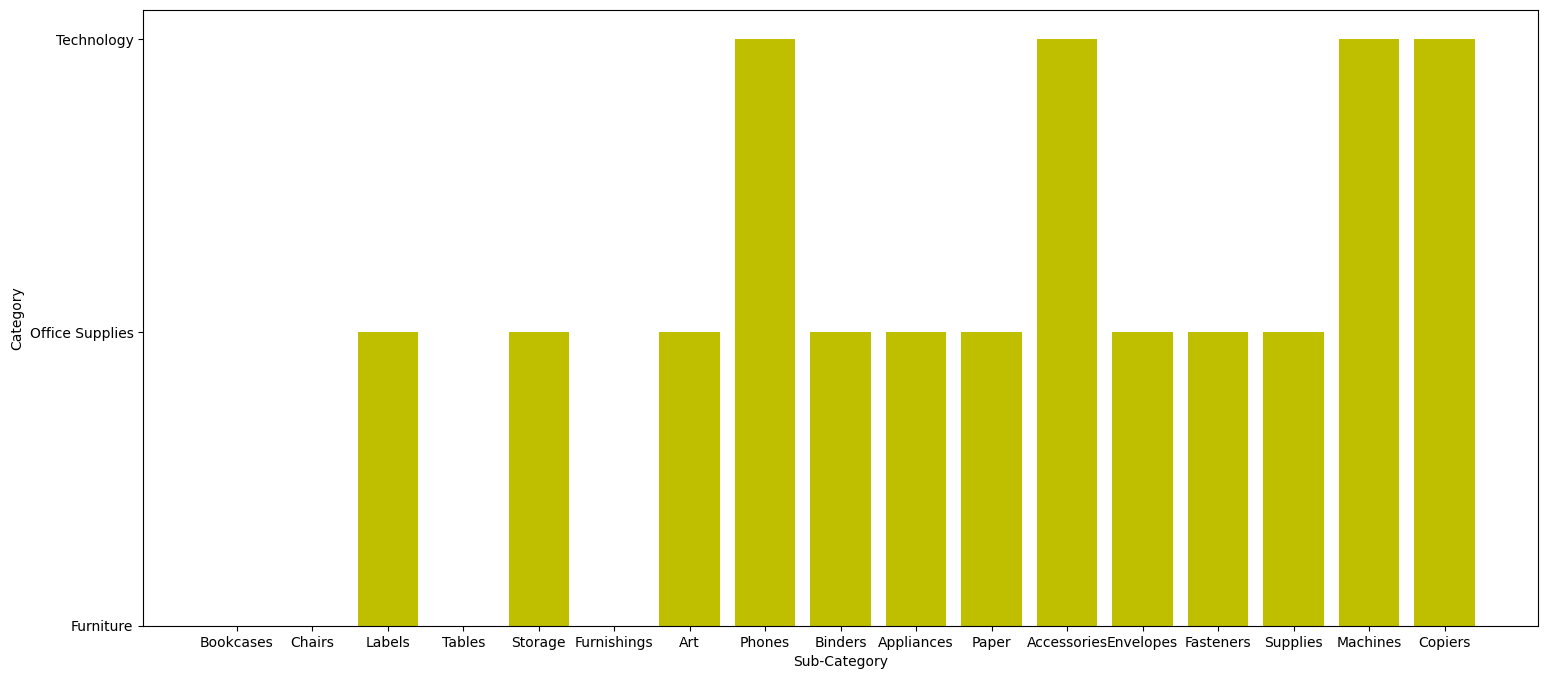

In [38]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

> * In Furniture category the frequency of individual item is very less
> * In Office supplies the frequency of individual item is medium
> * In Technology category the frequency of individual item is high

**Count plot of Sub-categories**

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


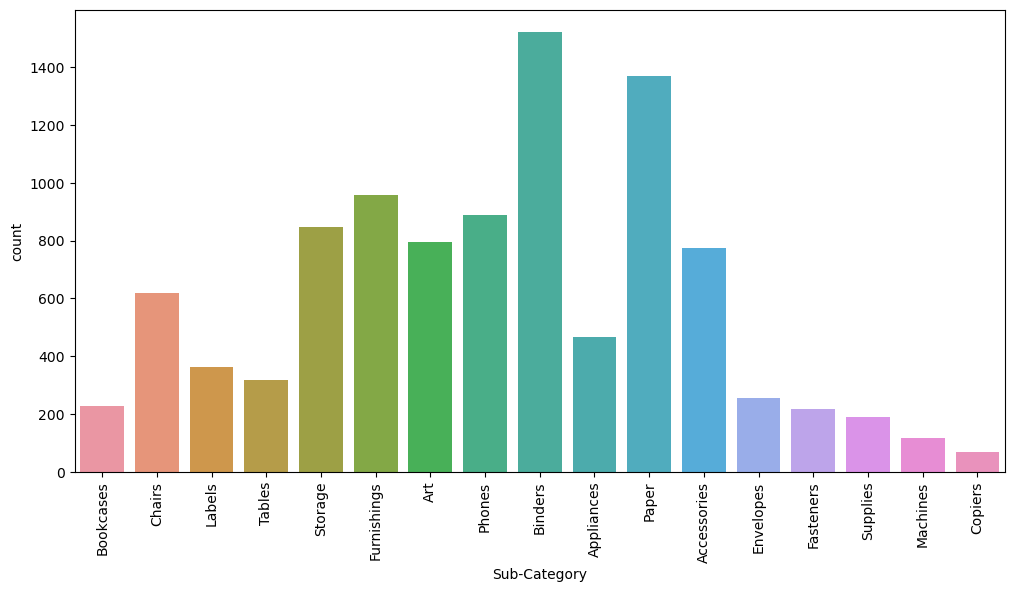

In [39]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

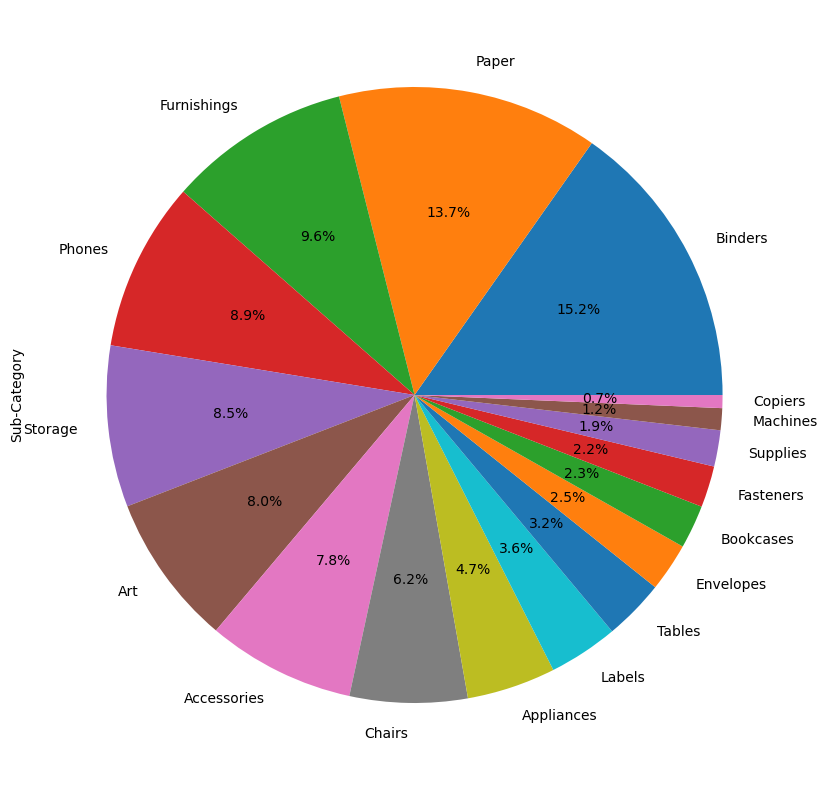

In [40]:
# Chart based on counts of Sub-categories
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The Store has wide variety of Office supplies especially Binders and Paper department

**Sub-Category Vs Profit**

<Axes: xlabel='Sub-Category', ylabel='Profit'>

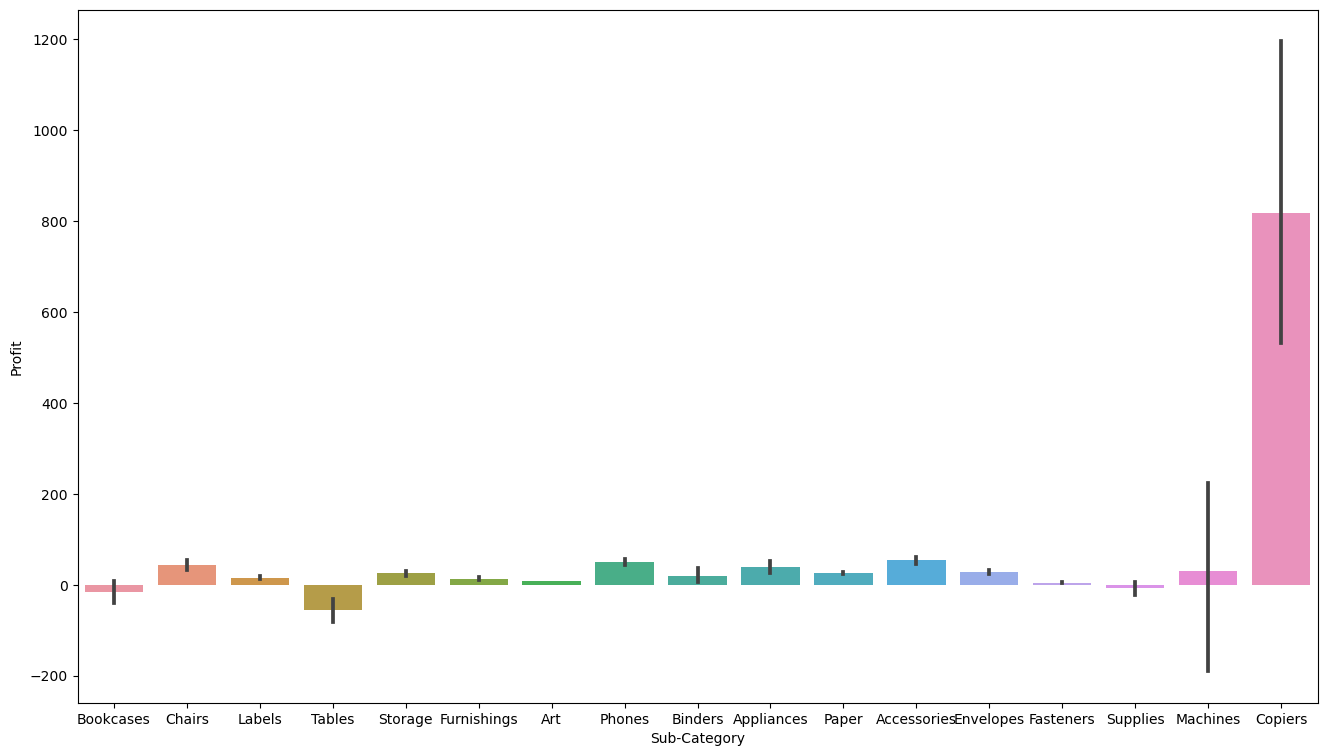

In [41]:
plt.figure(figsize=(16,9))
sns.barplot(x=df['Sub-Category'],y=df['Profit'])

 Highest Profit is earned in copiers

### **Profit and Sales per Sub-Category**

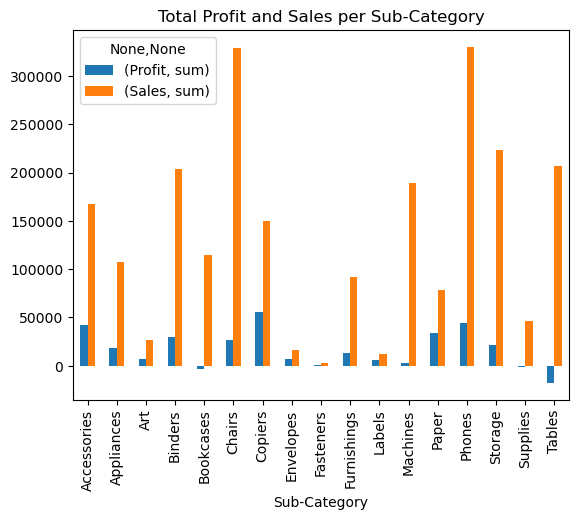

In [42]:
# Total Profit and Sales per Sub-Category
df.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people don't prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

#### **Analysis based on States**

### **Count plot of States**

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

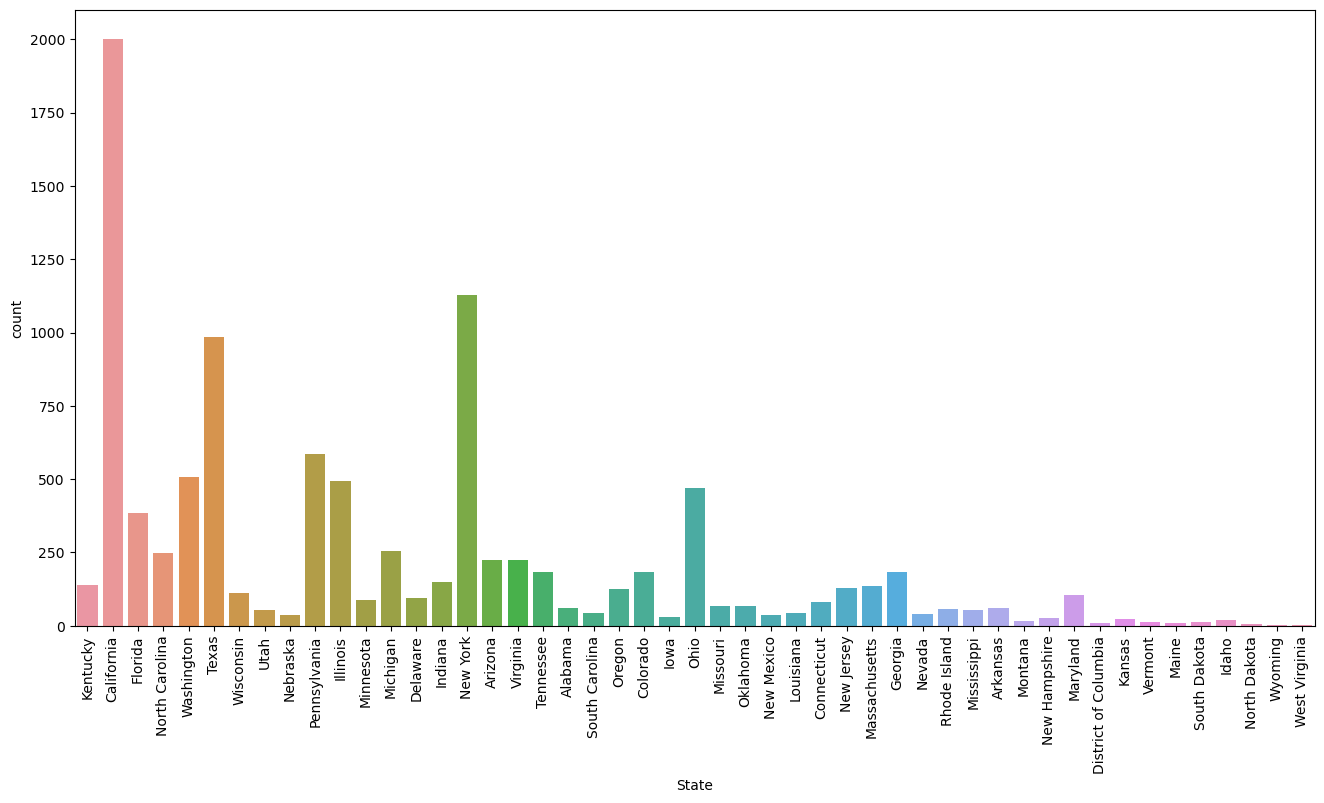

In [43]:
print(df['State'].value_counts())
plt.figure(figsize=(16,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

**Profit & Sales based on States**

<Axes: xlabel='State'>

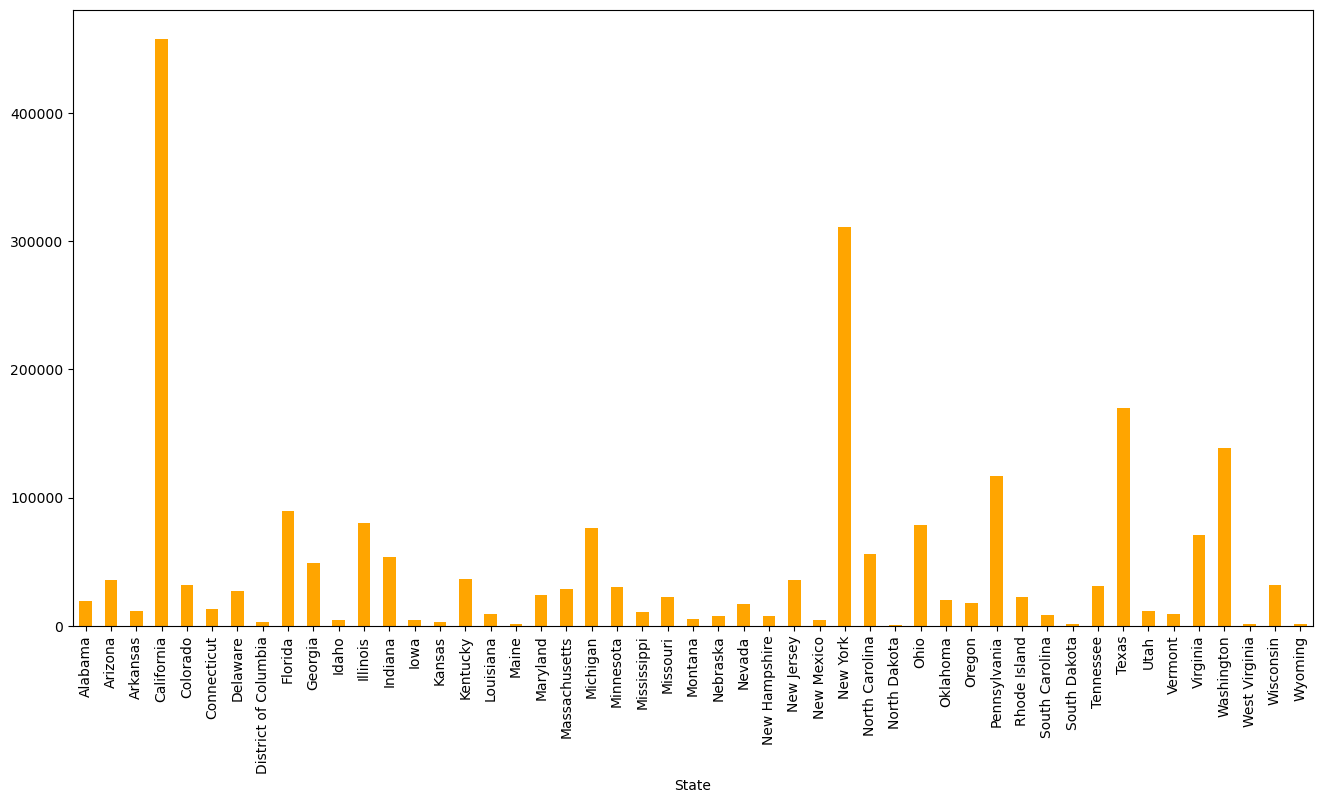

In [44]:
# Sales analysis based on States
df.groupby('State')['Sales'].sum().plot.bar(color='orange',figsize=(16,8))

<Axes: xlabel='State'>

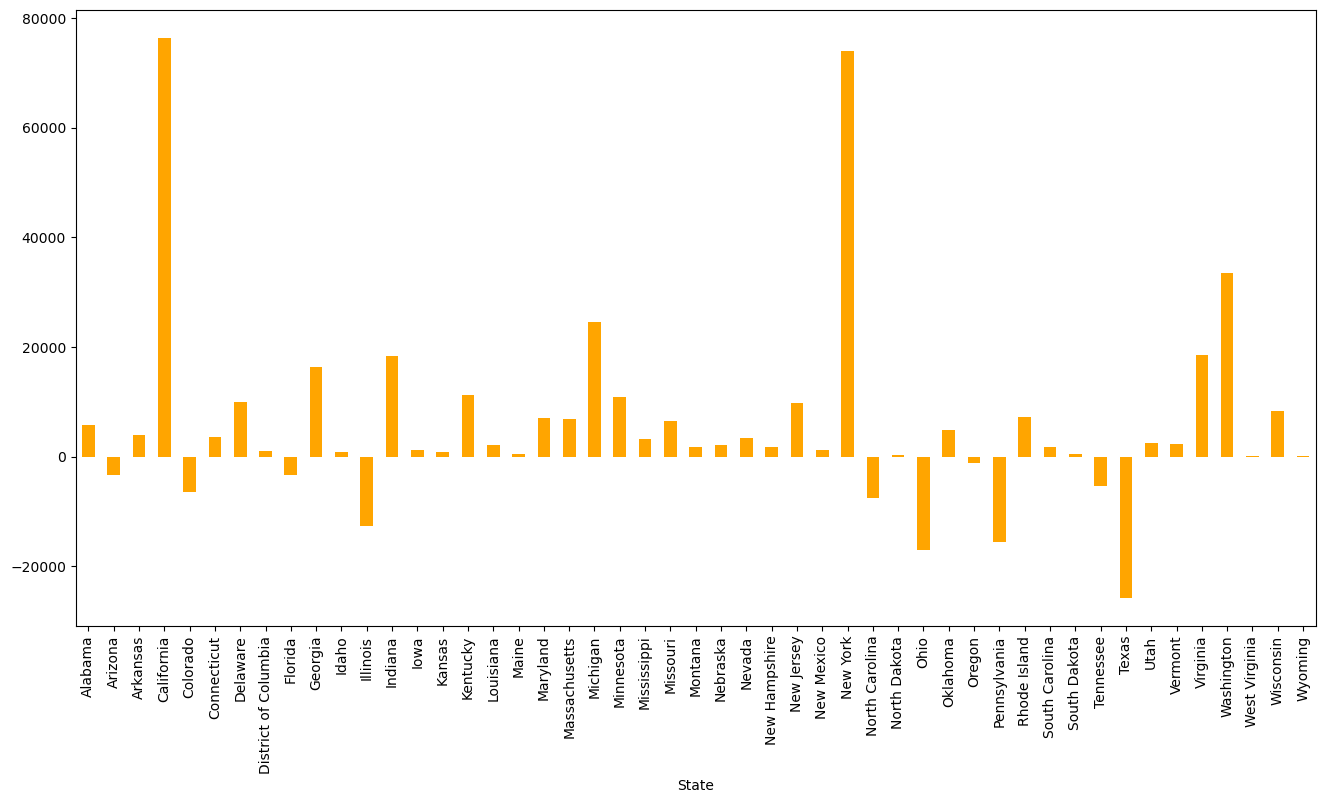

In [45]:
# Profit analysis based on States
df.groupby('State')['Profit'].sum().plot.bar(color='orange',figsize=(16,8))

### **Total Profit and Sales per States**

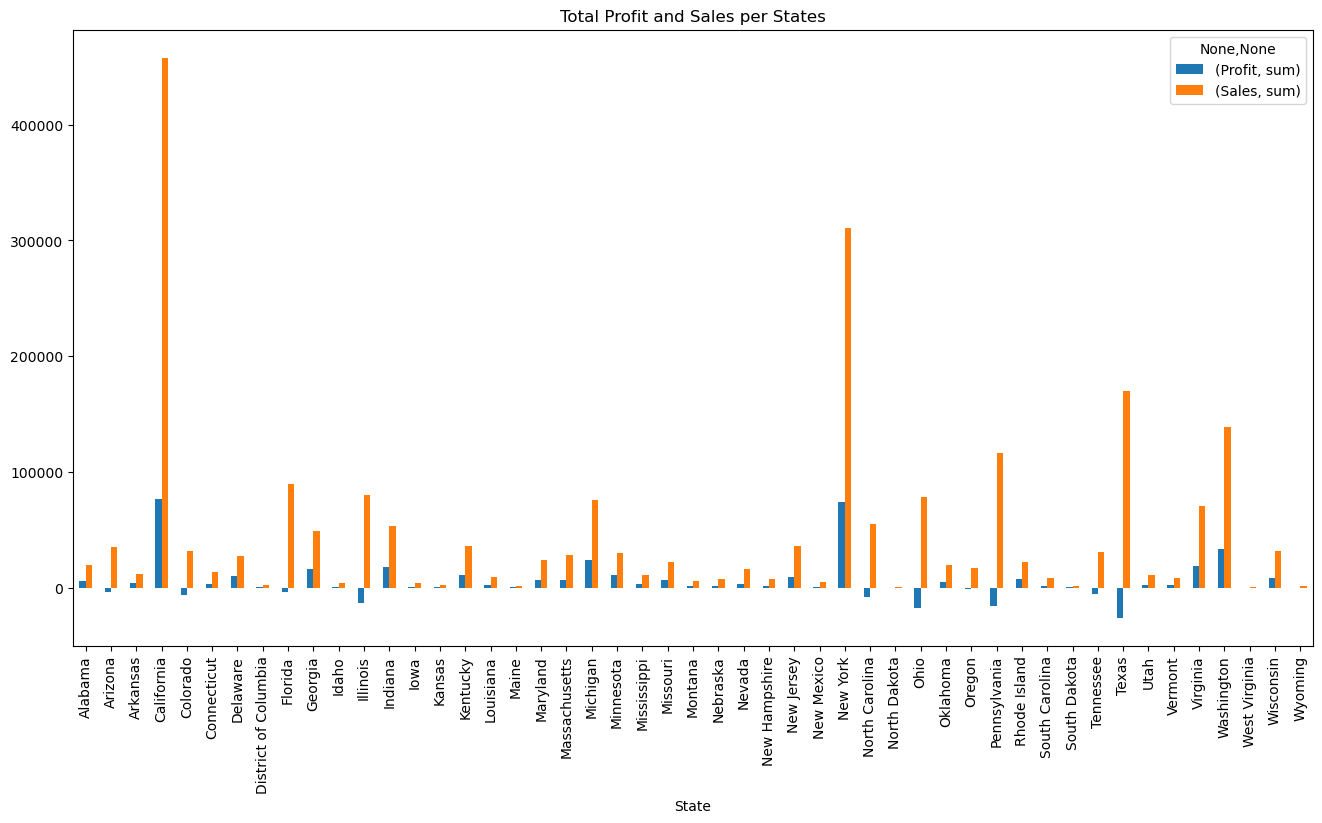

In [46]:
df.groupby('State')[['Profit','Sales']].agg(['sum']).plot.bar(figsize=(16,8))
plt.title('Total Profit and Sales per States')
plt.show()

Highest profit is earned in California and new York State also Selling price is extremely high in California and new York State.


#### **Statistical Analysis**

## **Heat map of correlation among the columns**

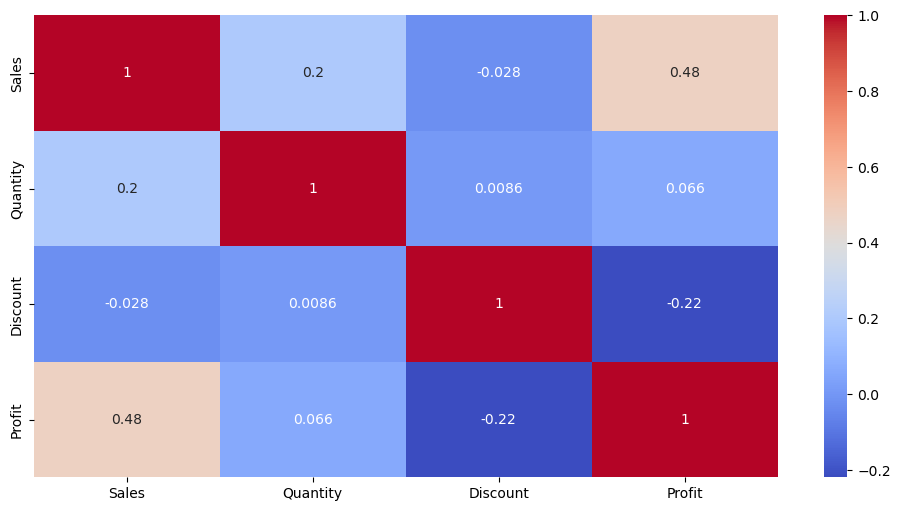

In [47]:
fig,axes = plt.subplots(1,1,figsize=(12,6),)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### **Heat map of Covariance among the set of variables**

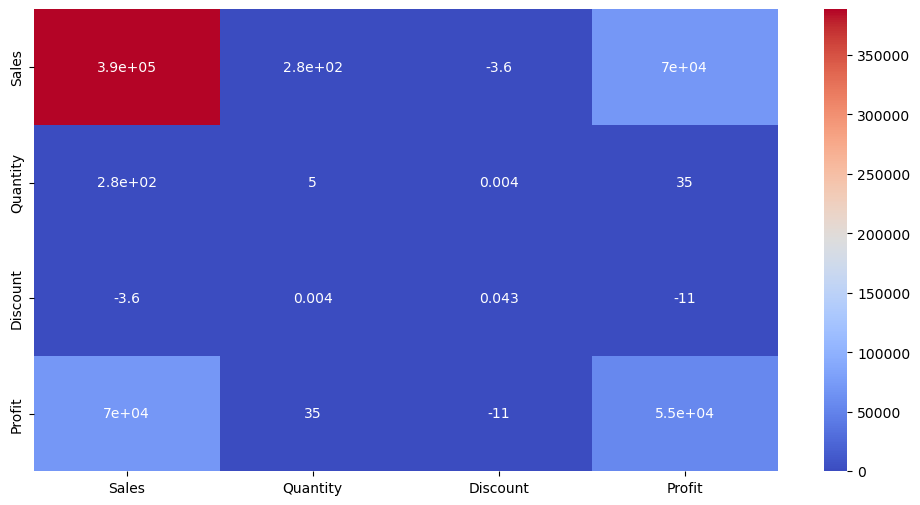

In [48]:
fig,axes = plt.subplots(1,1,figsize=(12,6),)
sns.heatmap(df.cov(),annot=True,cmap='coolwarm')
plt.show()

## **Line plot of discount Vs Profit**

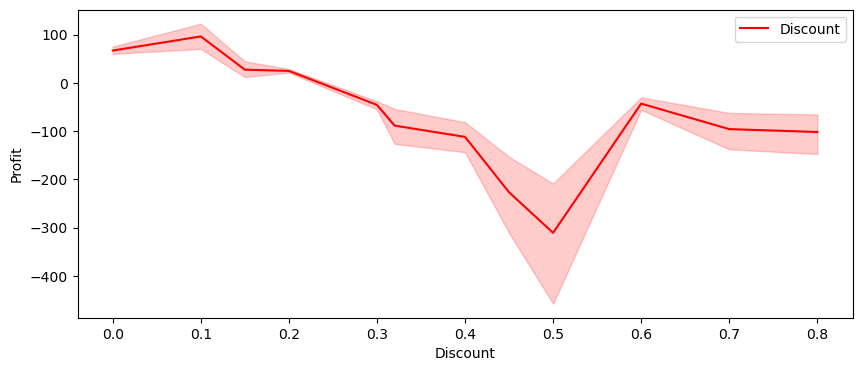

In [49]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Discount', y='Profit', data=df, color='r', label='Discount')
plt.legend()

### **Histogram of Data**

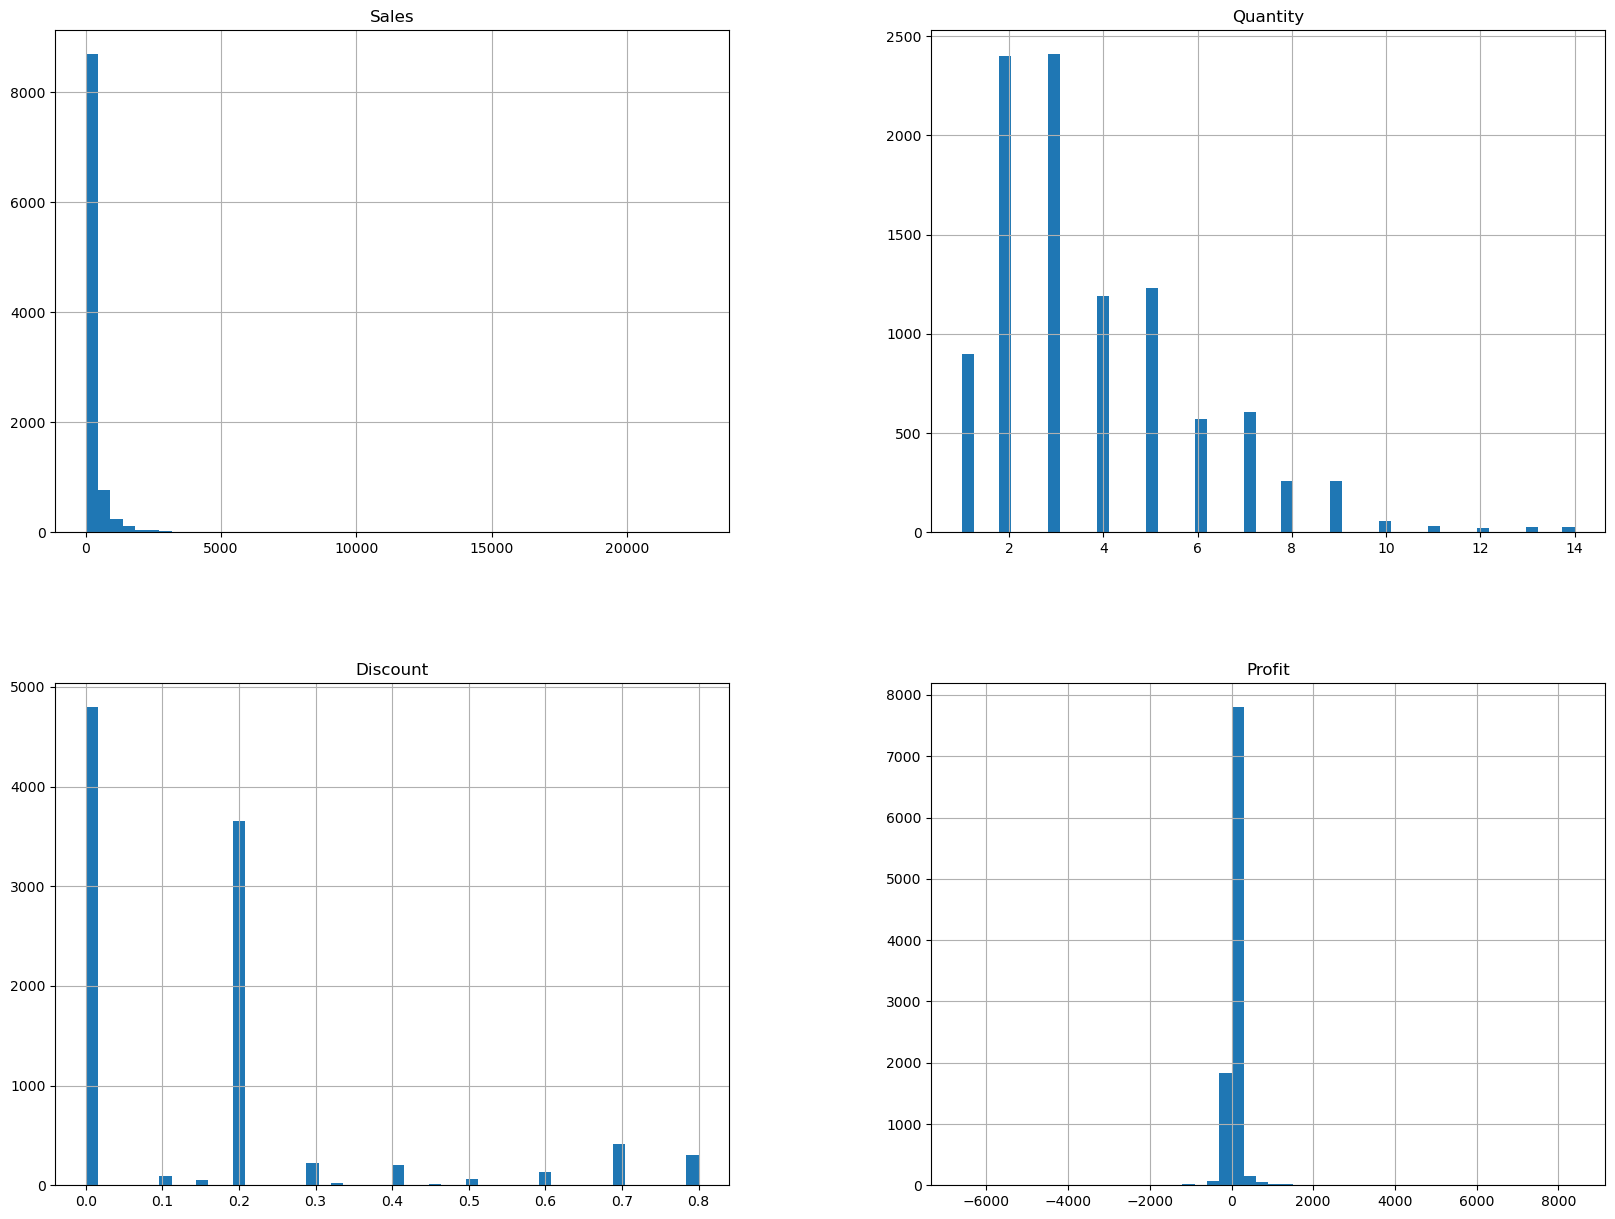

In [50]:
df.hist(bins=50,figsize=(20,15))
plt.show()

**Pair Plot of Sub-Category**

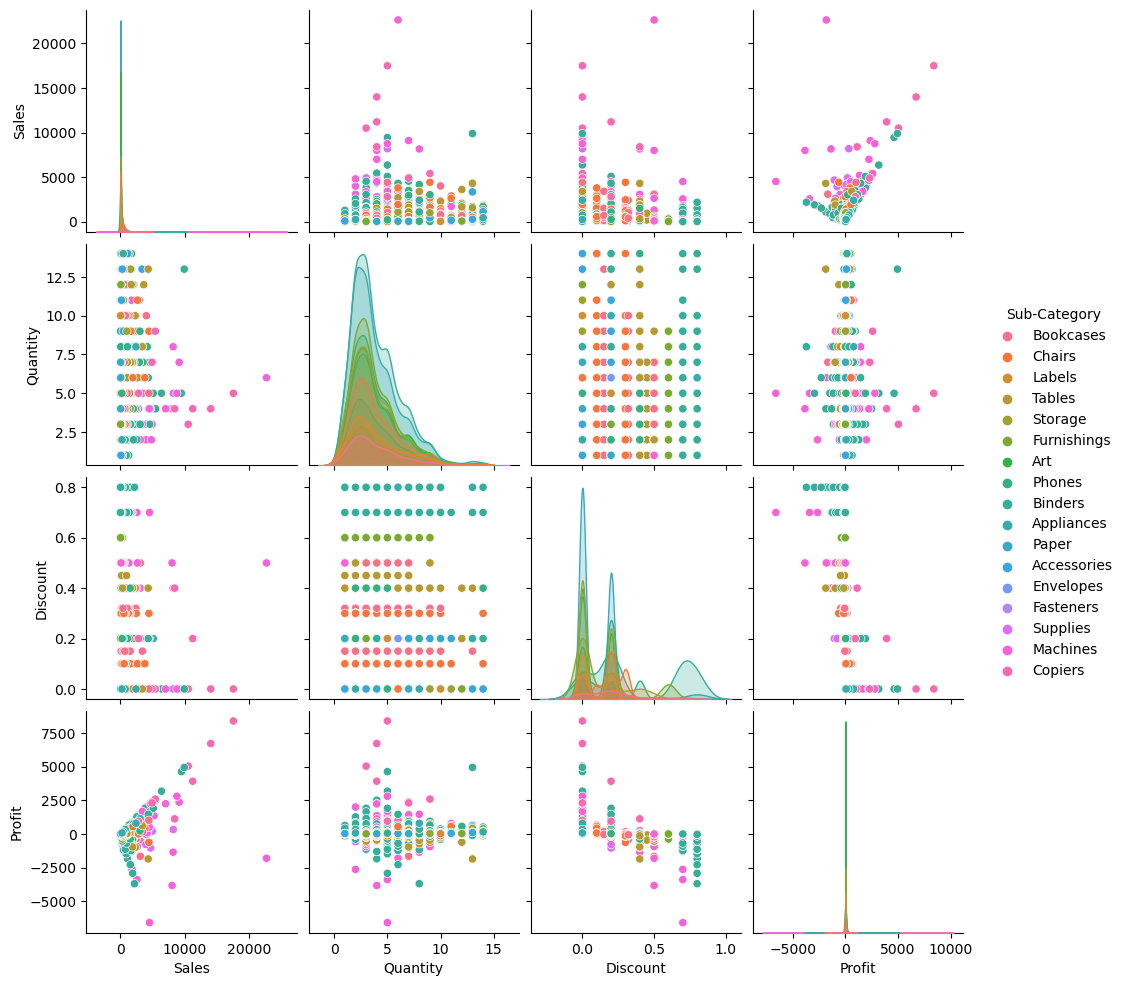

In [51]:
figsize=(20,15)
sns.pairplot(df,hue='Sub-Category')

**Summary of Data**

In [52]:
group=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
group

Ship Mode      Segment    Category Sub-Category       State  \
0        First Class     Consumer   Furniture    Bookcases     Arizona   
1        First Class     Consumer   Furniture    Bookcases  California   
2        First Class     Consumer   Furniture    Bookcases    Colorado   
3        First Class     Consumer   Furniture    Bookcases     Florida   
4        First Class     Consumer   Furniture    Bookcases     Georgia   
...              ...          ...         ...          ...         ...   
2978  Standard Class  Home Office  Technology       Phones       Texas   
2979  Standard Class  Home Office  Technology       Phones     Vermont   
2980  Standard Class  Home Office  Technology       Phones    Virginia   
2981  Standard Class  Home Office  Technology       Phones  Washington   
2982  Standard Class  Home Office  Technology       Phones   Wisconsin   

       Region  Quantity  Discount     Sales    Profit  
0        West         5      0.70   181.470 -320.5970  
1        West         9      0.45  1809.497  243.2526  
2        West         3      0.70    89.991 -152.9847  
3       South         3      0.20   314.352  -15.7176  
4       South         5      0.00   354.900   88.7250  
...       ...       ...       ...       ...       ...  
2978  Central        12      0.60   808.704   77.9712  
2979     East         5      0.00  1294.750  336.6350  
2980    South        17      0.00   365.130   58.7384  
2981     West        17      1.20  1989.448   63.2645  
2982  Central         1      0.00   125.990   35.2772  

[2983 rows x 10 columns]

**State wise Statistical Summary of Data**

In [53]:
df.groupby("State").Profit.agg(['sum','mean','min','max','count','median','std','var'])

sum        mean        min        max  count  \
State                                                                       
Alabama                5786.8253   94.865989     0.0000  1459.2000     61   
Arizona               -3427.9246  -15.303235  -814.4832   211.4955    224   
Arkansas               4008.6871   66.811452     1.4190   843.1706     60   
California            76381.3871   38.171608  -325.5720  1906.4850   2001   
Colorado              -6527.8579  -35.867351 -3399.9800   247.9960    182   
Connecticut            3511.4918   42.823071   -15.5826   294.6710     82   
Delaware               9977.3748  103.930988   -48.7839  5039.9856     96   
District of Columbia   1059.5893  105.958930     4.4344   648.5624     10   
Florida               -3399.3017   -8.875461 -1811.0784   327.5922    383   
Georgia               16250.0433   88.315453     0.1134  3177.4750    184   
Idaho                   826.7231   39.367767     1.1151   259.5297     21   
Illinois             -12607.8870  -25.625787 -2929.4845   874.9875    492   
Indiana               18382.9363  123.375411     0.0000  8399.9760    149   
Iowa                   1183.8119   39.460397     2.5920   394.2680     30   
Kansas                  836.4435   34.851813     1.7280   149.3820     24   
Kentucky              11199.6966   80.573357     0.0000  1416.8000    139   
Louisiana              2196.1023   52.288150     1.8672   346.0396     42   
Maine                   454.4862   56.810775     3.8822   131.3550      8   
Maryland               7031.1788   66.963608   -47.1798  1270.9900    105   
Massachusetts          6785.5016   50.262975  -297.6848   503.7822    135   
Michigan              24463.1876   95.934069     0.0000  4946.3700    255   
Minnesota             10823.1874  121.608847     0.0000  4630.4755     89   
Mississippi            3172.9762   59.867475     0.0000   388.8128     53   
Missouri               6436.2105   97.518341     2.2990  2302.9671     66   
Montana                1833.3285  122.221900     2.2098  1379.9770     15   
Nebraska               2037.0942   53.607742     0.2016   743.9880     38   
Nevada                 3316.7659   85.045279  -109.5822  1644.2913     39   
New Hampshire          1706.5028   63.203807  -105.3164   517.4793     27   
New Jersey             9772.9138   75.176260   -31.3722  2365.9818    130   
New Mexico             1157.1161   31.273408    -5.6943   138.3552     37   
New York              74038.5486   65.637011  -553.6476  3919.9888   1128   
North Carolina        -7490.9122  -30.083985 -3839.9904   303.8040    249   
North Dakota            230.1497   32.878529     0.8680   162.0948      7   
Ohio                 -16971.3766  -36.186304 -6599.9780   607.6080    469   
Oklahoma               4853.9560   73.544788     0.5520   523.7052     66   
Oregon                -1190.4705   -9.600569  -384.7164   228.0792    124   
Pennsylvania         -15559.9603  -26.507598 -1665.0522  1119.9968    587   
Rhode Island           7285.6293  130.100523  -127.5792  2591.9568     56   
South Carolina         1769.0566   42.120395     0.5584   422.5100     42   
South Dakota            394.8283   32.902358     1.3068   132.5898     12   
Tennessee             -5341.6936  -29.189583 -1237.8462   223.9936    183   
Texas                -25729.3563  -26.121174 -3701.8928   624.9875    985   
Utah                   2546.5335   48.047802     0.2016   449.9850     53   
Vermont                2244.9783  204.088936     0.9588  1013.1270     11   
Virginia              18597.9504   83.026564     0.0000  2799.9840    224   
Washington            33402.6517   66.013146   -73.0548  6719.9808    506   
West Virginia           185.9216   46.480400   -76.9536   219.4416      4   
Wisconsin              8401.8004   76.380004     0.2598   673.8816    110   
Wyoming                 100.1960  100.196000   100.1960   100.1960      1   

                         median         std            var  
State                                   

**Pair Plot of data**

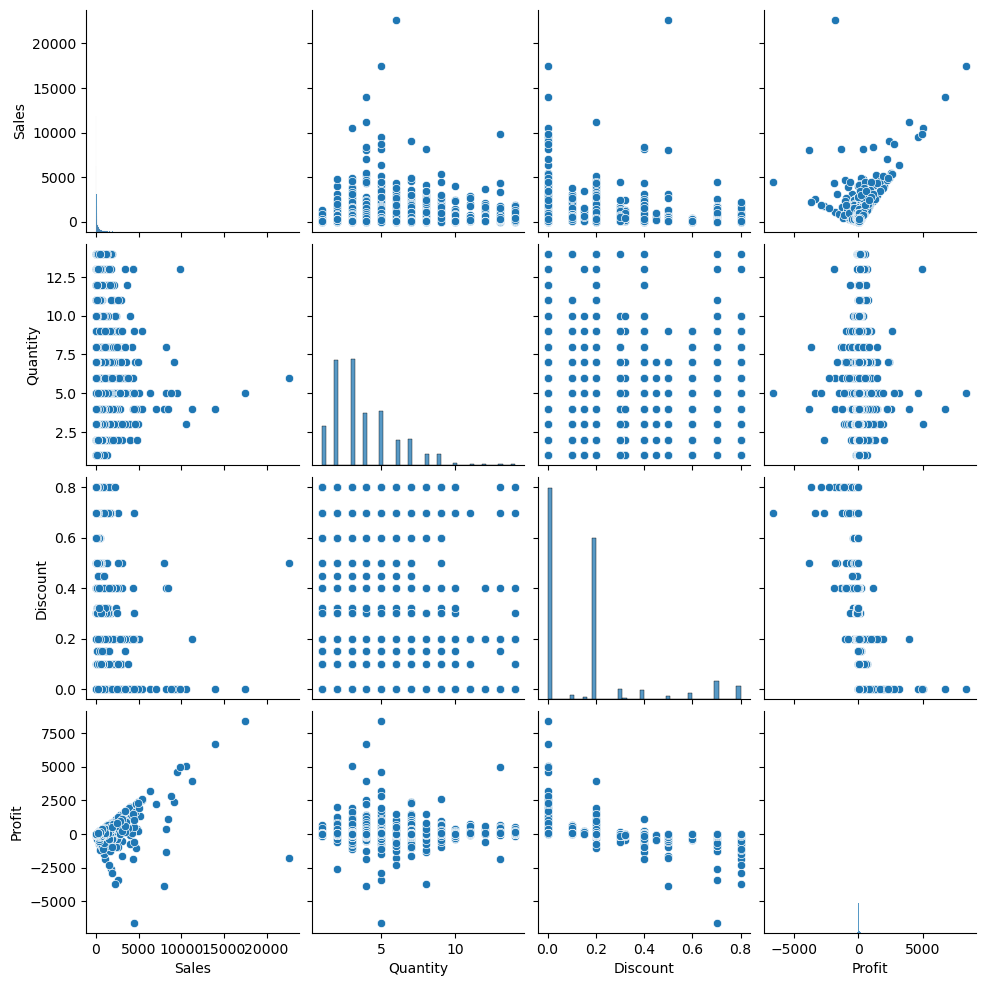

In [54]:
sns.pairplot(df)

**Box plot of Sales**

<Axes: >

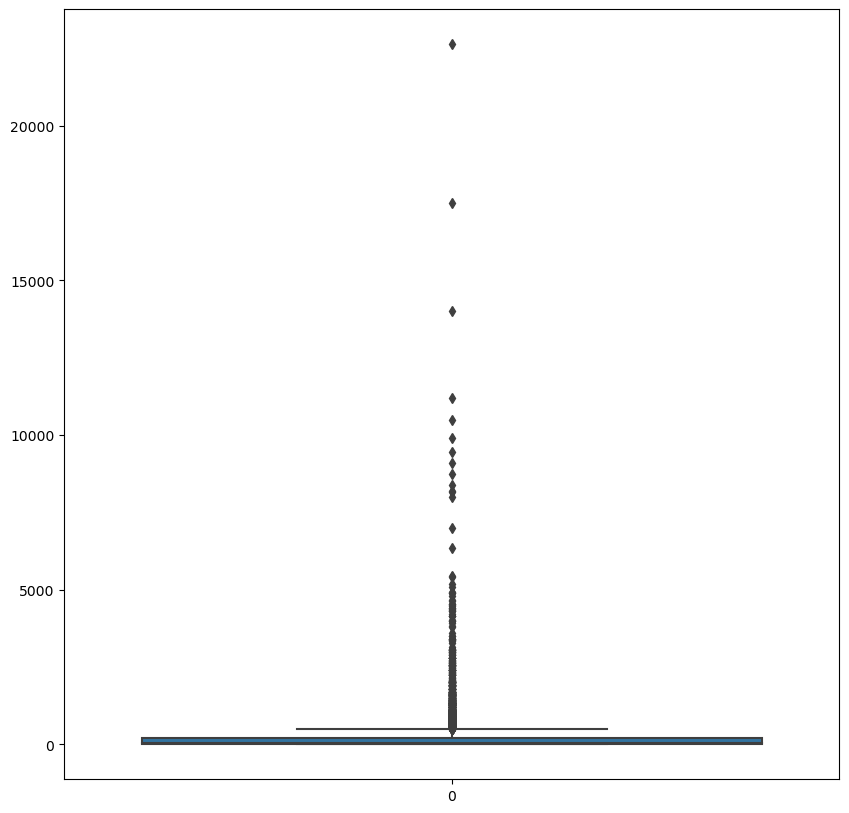

In [55]:
fig, axes= plt.subplots(figsize=(10, 10))
sns.boxplot(df['Sales'])

**Box plot of Discount**

<Axes: >

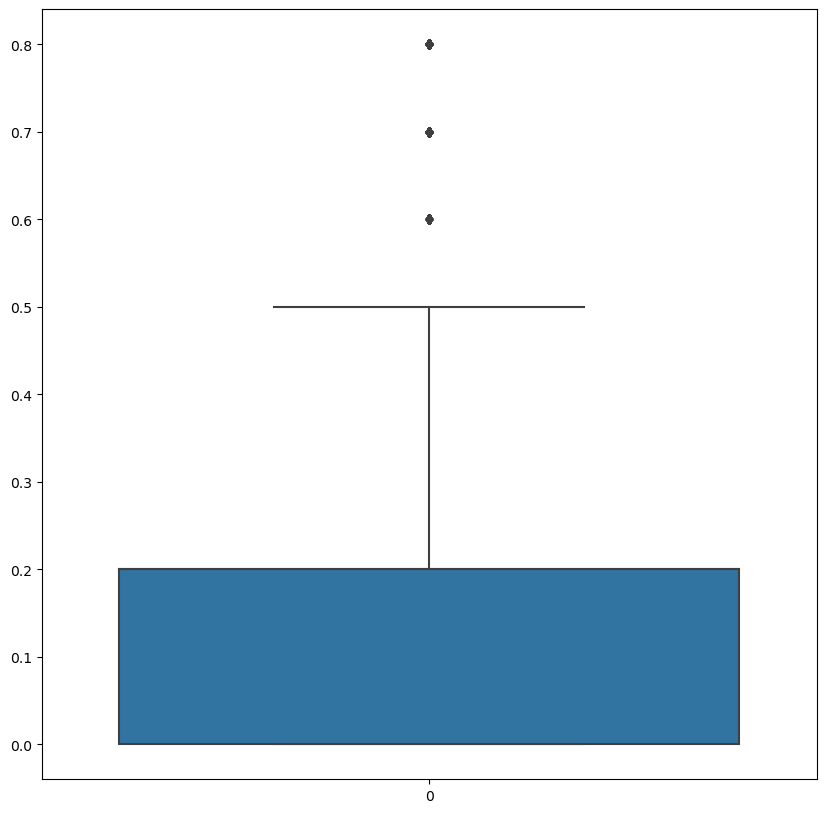

In [56]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.boxplot(df['Discount'])

**Box plot of Profit**

<Axes: >

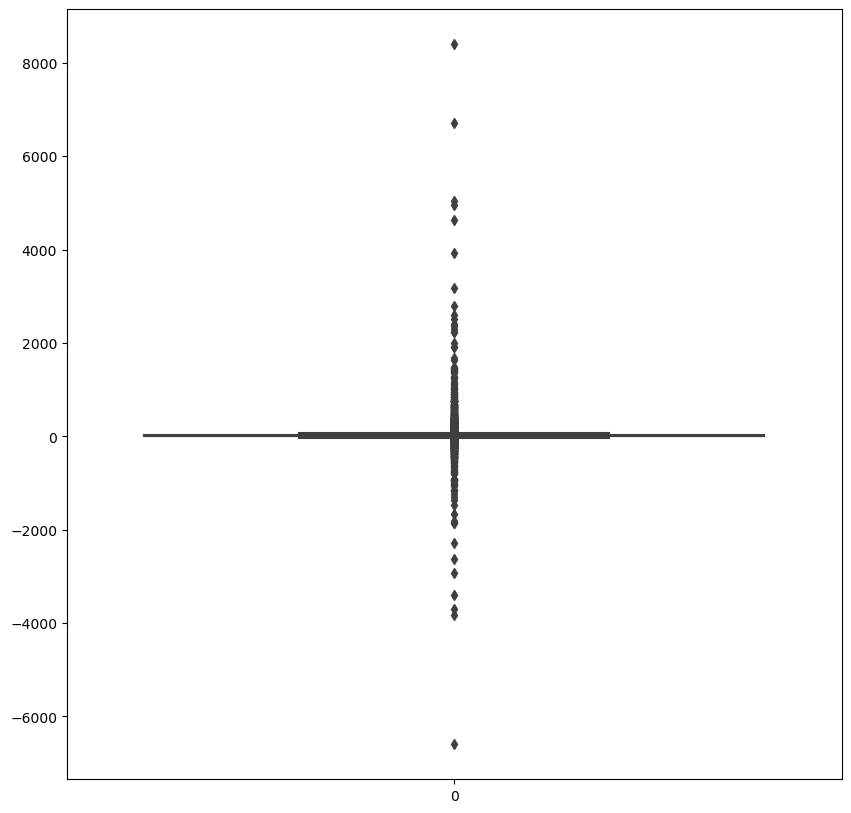

In [57]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.boxplot(df['Profit'])

In [58]:
Q1 = df.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
Q3 = df.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

In [59]:
IQR = Q3 - Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

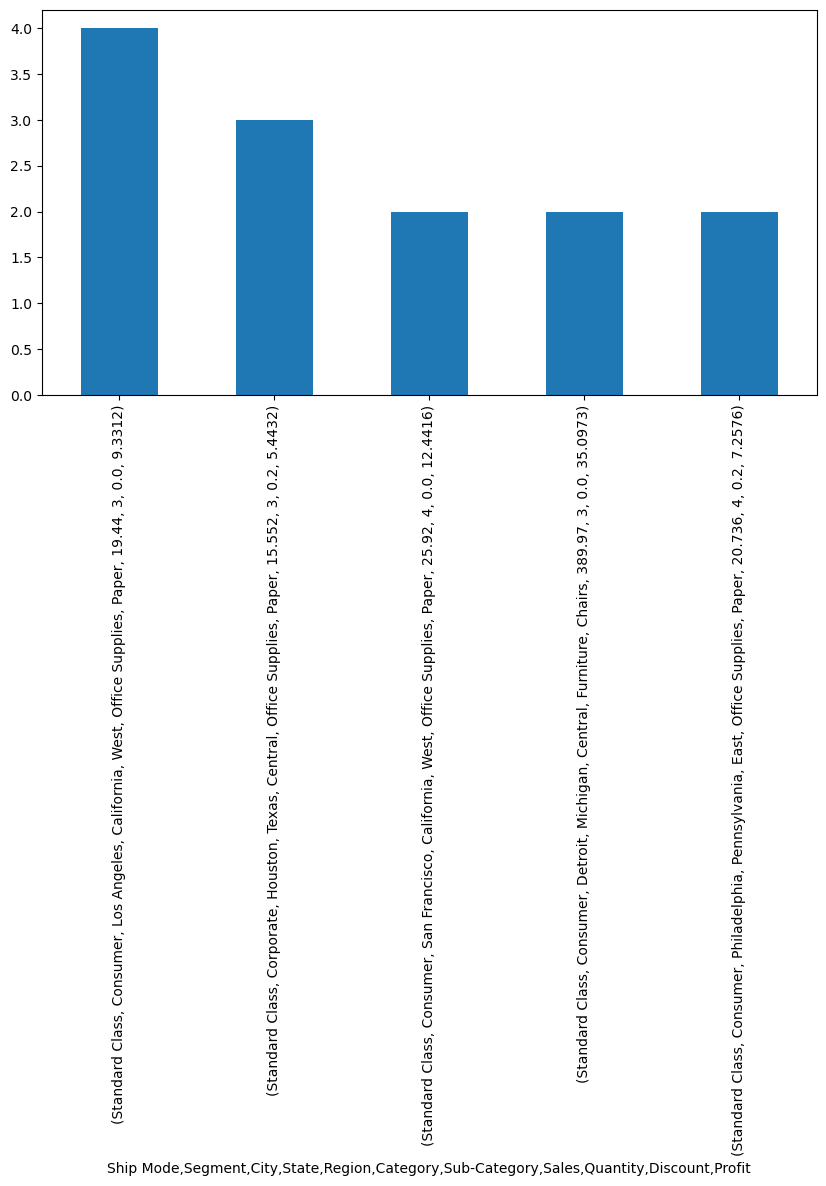

In [60]:
df.value_counts().nlargest().plot(kind='bar',figsize=(10,5))

**Plot of Value Counts**

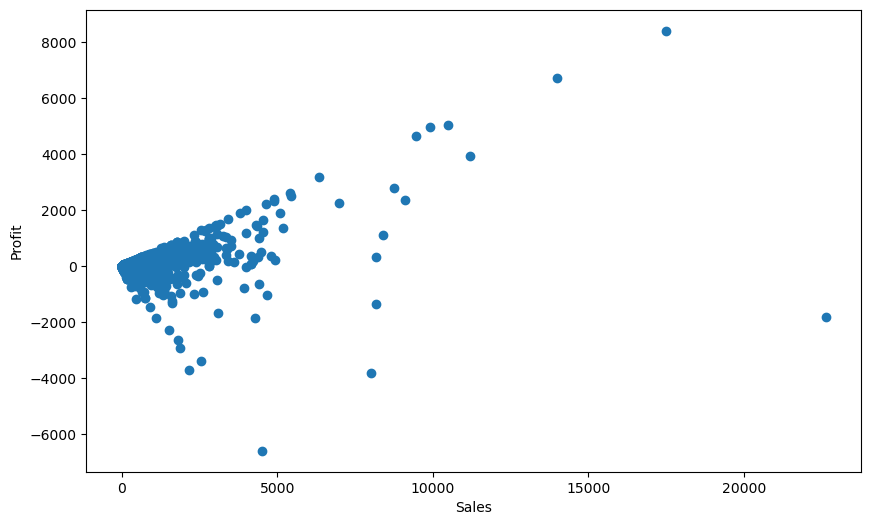

In [61]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['Sales'], df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

**Sales Statistical Data**

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


<Axes: xlabel='Sales', ylabel='Density'>

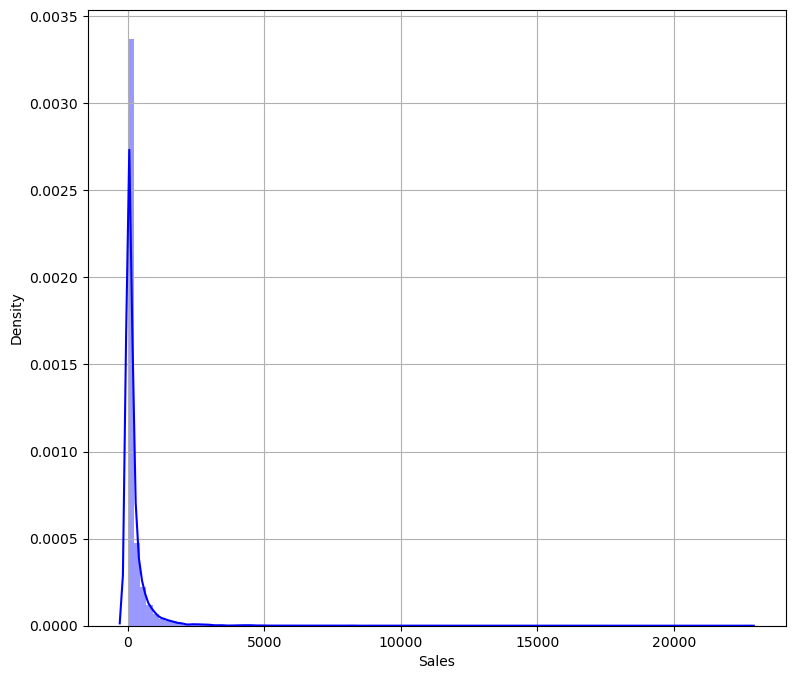

In [62]:
print(df['Sales'].describe())
plt.figure(figsize=(9,8))
plt.grid()
sns.distplot(df['Sales'], color='b', bins=100, hist_kws={'alpha':0.4})

**Box plot of Sales, Quantity, Discount & Profit**

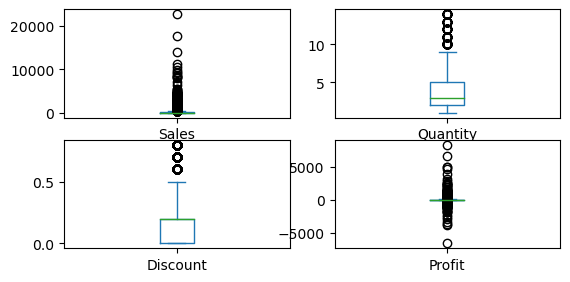

In [63]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = [20,18]
plt.show()

 ## **State wise Profit Count**

In [65]:
import plotly.express as px
fig = px.bar(df, x='State', color='Profit', title='Profit Count')
fig.show()

## **3D Plot of Profit & Sales**

In [66]:
fig = px.scatter_3d(df, x='State', y='Profit', z='Sales', color='Profit', title='3D Scatter Plot')
fig.show()

## **City wise Profit Count**

In [67]:
import plotly.express as px
fig = px.bar(df, x='City', color='Profit', title='Profit Count')
fig.show()

##  **Sub-Category wise Profit Count**

In [68]:
fig = px.scatter(df, x='Sub-Category', y='Profit', color='Profit', title='Sub-Category Vs. Profit')
fig.show()

### **Conclusion**

> * Profit in South & Central is less.
> * Profit in east & west region is better than south and central.
> * Highest Profit & Sales is in Consumer Segment.
> * Highest Profit is earned in copiers while selling price for Chairs and Phones is extremely high compared to other.
> * People don't prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.
> * The Store has wide variety of Office supplies especially binders and Paper department.
> * Highest profit & selling Price is earned in California and new York State.
> * Negative correlation between profit and discount
> * Total sum of profit in sale of table is negative
> * Profit is more in sale of copiers
> * No or very less profit in sale of supplies
> * Technology Segment is more Profitable